# OBJECTIVE: Create a machine learning algorithm to predict which passenger survies the sinking of the titanic.

In [1]:
#Importing packages
import numpy as np 
import pandas as pd

#Importing testing and training data sets
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

In [2]:
#Quick look at the top at both data set
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Analysis of the data set

In [4]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# visualization package to plot graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
print(trainData.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
trainData.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Early analysis by just having a quick look has told me a lot about the data

    - Cabin, age and embarked varaible/features contain missing values
    - Seven varaibles/features contain numerical data in the form of integers or floats
    - Five variables/features are string in the form of objects


Now let check if there is some correlation with the data based on some common assumption about the titanic

    - Firstly, did people who were richeir (or in better classes) had a better chance of survival
    - Secondly, did females have a better chance of survival then males
    - Finally, do children have a better chance of survival than adults, if so, is there and where is the age cut off point

In [9]:
#To determin the first assumption, we must dig into the Pclass varaible and feature
trainData["Pclass"].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [10]:
trainData["Pclass"]
# trainData["Pclass"].count()
sum(trainData.groupby(['Pclass']).size())

891

In [11]:
#Concluded that there are three types of classes. Let compare that to the Survived varaible/feature
trainData[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
#From the result above, it is clear that if you were in Class 1 you have a 62.9% chance of survival compared to 47.3% in Class 2 and only 24.2% in Class 3.
# Note: That Class 1 is the highest and Class 3 is the lowest in Pclass

#Now lets check the second assumption which is do female have a better chance of survival than males.
trainData[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


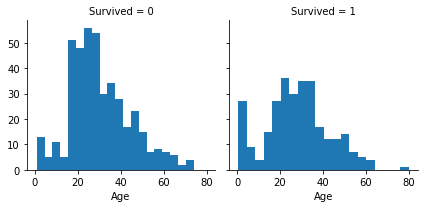

In [13]:
#The results above show that females are more than 4 times likely to survive!

#Finally, do children have a better chance of survival compared to adults
# sns.scatterplot(data=trainData, x="Age", y="Survived")
# trainData[["Age", "Survived"]].groupby(["Age"])


g = sns.FacetGrid(trainData, col='Survived')
g.map(plt.hist, 'Age', bins=20)



In [14]:
#

In [15]:
#Let also check some other varaible to see if there are a correlation or not
trainData[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
#

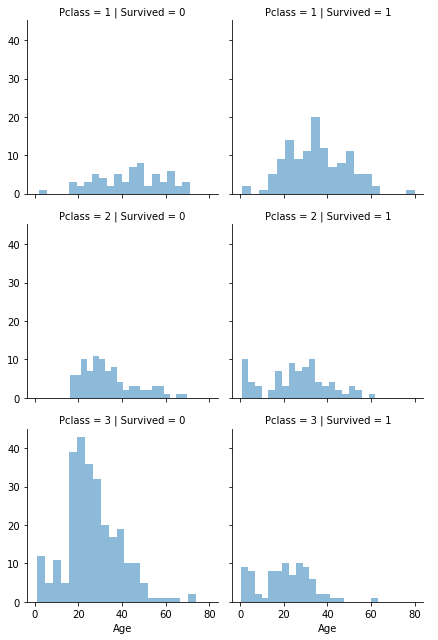

In [17]:
#From the three assumption and some analysis on other variables, I think it is a good time to look at the Pclass
#and see the distribution of the data based on Class and Survived

grid = sns.FacetGrid(trainData, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\KameronDesktop\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KameronDesktop\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\KameronDesktop\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


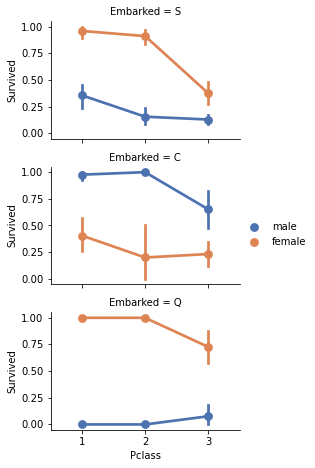

In [18]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(trainData, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\KameronDesktop\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KameronDesktop\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


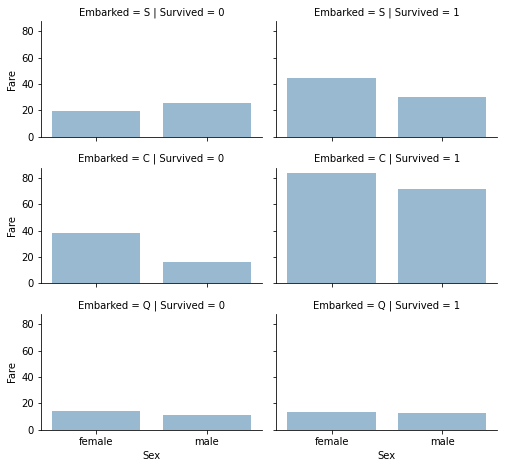

In [19]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(trainData, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [20]:
#After depper analysis, I've have decided to drop the ticket and the cabin varaible/feature.
#This is because they've had little use to me and will have no use to the machine learning model
trainData = trainData.drop(["Ticket", "Cabin"], axis=1);
testData = testData.drop(["Ticket", "Cabin"], axis=1);

In [21]:
#However, I will create new varaible/features that will have uses in predicting the survival rate.
#Firstly, we could use titles as a catigorical varaible if we see a correlation in sex then survival.



totalDataSet = [trainData, testData]

for d in totalDataSet:
    d['Title'] = d.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(trainData['Title'], trainData['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
#I will categorise the most common like Miss and Mr but have ones like Capt or Countess as Rare
#I will also see how it compares to the survival rates
for d in totalDataSet:
    d['Title'] = d['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    d["Title"] = d["Title"].replace("Mlle", "Miss")
    d["Title"] = d["Title"].replace("Ms", "Miss")
    d["Title"] = d["Title"].replace("Mme", "Mrs")
    
trainData[["Title", "Survived"]].groupby(["Title"], as_index="False").mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [23]:
#Converting string to ordinal data

titleOrdData = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for d in totalDataSet:
    d['Title'] = d['Title'].map(titleOrdData)
    d['Title'] = d['Title'].fillna(0)


In [24]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [25]:
#Safe to drop Name
trainData = trainData.drop(['Name'], axis=1)
testData = testData.drop(['Name'], axis=1)
totalDataSet = [trainData, testData]

In [26]:
trainData.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,3
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,3
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [27]:
#Also think it a good time to also turn sex a binary varaible


for d in totalDataSet:
    d['Sex'] = d['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

trainData.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [28]:
#Missing data
#Replacing missing data with the mean value!
trainData["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
avgAge = 30


In [30]:
totalDataSet = [trainData, testData]
trainData['Age'].fillna(avgAge)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [31]:
testData['Age'].fillna(avgAge)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    30.0
414    39.0
415    38.5
416    30.0
417    30.0
Name: Age, Length: 418, dtype: float64

In [32]:
totalDataSet = [trainData, testData]

In [33]:
trainData["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
trainData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 66.3+ KB


In [35]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    int64  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 27.9+ KB


In [36]:
trainData["Age"].fillna(avgAge, inplace=True)
testData["Age"].fillna(avgAge, inplace=True)

testData["Age"].fillna(avgAge, inplace=True)

In [37]:
#Decided to create a new variable to see if the family size onboard the titanic has a greater or less chance of survival based
#on the size of the family.
totalDataSet = [trainData, testData]
for d in totalDataSet:
    d['FamilySize'] = d['SibSp'] + d['Parch'] + 1

In [38]:
trainData[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [39]:
#Let check if you have a greater chance of survival if you are alone instead.
totalDataSet = [trainData, testData]
for d in totalDataSet:
    d["IsAlone"] = 0
    d.loc[d['FamilySize'] == 1, 'IsAlone'] = 1

trainData['IsAlone']


0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64

In [40]:
trainData["IsAlone"].fillna(0, inplace=True)

In [41]:
trainData[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [42]:
#Seem to be some correlation between IsAlone. Might as well get rid of Family size, parch and SibSp
trainData = trainData.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
testData = testData.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
totalDataSet = [trainData, testData]

In [43]:
trainData.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,7.2500,S,1,0
1,2,1,1,1,38.0,71.2833,C,3,0
2,3,1,3,1,26.0,7.9250,S,2,1
3,4,1,1,1,35.0,53.1000,S,3,0
4,5,0,3,0,35.0,8.0500,S,1,1


In [44]:
#Back to imputing missing features/varaible we will impute and transform the embark feature/variabbles
#I will fill in missing values with the most medium value

medium = trainData.Embarked.dropna().mode()


In [45]:
for d in totalDataSet:
    d["Embarked"] = d['Embarked'].fillna('S')

In [46]:
trainData[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [47]:
#converting to numerical data
totalDataSet = [trainData, testData]
for d in totalDataSet:
    d["Embarked"] = d["Embarked"].map({"S": 0, "Q": 1, "C": 2})
    
trainData.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,7.2500,0,1,0
1,2,1,1,1,38.0,71.2833,2,3,0
2,3,1,3,1,26.0,7.9250,0,2,1
3,4,1,1,1,35.0,53.1000,0,3,0
4,5,0,3,0,35.0,8.0500,0,1,1


In [48]:
testData['Fare'].fillna(testData['Fare'].dropna().median(), inplace=True)
testData.head()



,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34.5,7.8292,1,1,1
1,893,3,1,47.0,7.0000,0,3,0
2,894,2,0,62.0,9.6875,1,1,1
3,895,3,0,27.0,8.6625,0,1,1
4,896,3,1,22.0,12.2875,0,3,0


In [49]:
testData["IsAlone"].fillna(0, inplace=True)

In [50]:
testData.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34.5,7.8292,1,1,1
1,893,3,1,47.0,7.0000,0,3,0
2,894,2,0,62.0,9.6875,1,1,1
3,895,3,0,27.0,8.6625,0,1,1
4,896,3,1,22.0,12.2875,0,3,0


# **Machine learning models**

In [51]:
xTrain = trainData.drop("Survived", axis=1)
yTrain = trainData["Survived"]

xTest = testData
xTest.shape, yTrain.shape, xTrain.shape


((418, 8), (891,), (891, 8))

In [52]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
#Feature scalling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(xTrain)
X_test = sc.transform(xTest)



In [54]:
X_train

array([[-1.73010796,  0.82737724, -0.73769513, ..., -0.58595414,
        -0.7075504 , -1.2316449 ],
       [-1.72622007, -1.56610693,  1.35557354, ...,  1.9423032 ,
         1.2352151 , -1.2316449 ],
       [-1.72233219,  0.82737724,  1.35557354, ..., -0.58595414,
         0.26383235,  0.81192233],
       ...,
       [ 1.72233219,  0.82737724,  1.35557354, ..., -0.58595414,
         0.26383235, -1.2316449 ],
       [ 1.72622007, -1.56610693, -0.73769513, ...,  1.9423032 ,
        -0.7075504 ,  0.81192233],
       [ 1.73010796,  0.82737724, -0.73769513, ...,  0.67817453,
        -0.7075504 ,  0.81192233]])

In [55]:
X_test

array([[ 1.73399584,  0.82737724, -0.73769513, ...,  0.67817453,
        -0.7075504 ,  0.81192233],
       [ 1.73788372,  0.82737724,  1.35557354, ..., -0.58595414,
         1.2352151 , -1.2316449 ],
       [ 1.74177161, -0.36936484, -0.73769513, ...,  0.67817453,
        -0.7075504 ,  0.81192233],
       ...,
       [ 3.34746731,  0.82737724, -0.73769513, ..., -0.58595414,
        -0.7075504 ,  0.81192233],
       [ 3.35135519,  0.82737724, -0.73769513, ..., -0.58595414,
        -0.7075504 ,  0.81192233],
       [ 3.35524307,  0.82737724, -0.73769513, ...,  1.9423032 ,
         2.20659785, -1.2316449 ]])

In [56]:
classifier = LogisticRegression()
classifier.fit(X_train, yTrain)

LogisticRegression()

In [57]:
yPred = classifier.predict(X_test)

In [58]:
yPred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [60]:
acc_log = round(classifier.score(X_train, yTrain) * 100, 2)
acc_log

81.37

In [61]:
#Support vector machine vectors
svc = SVC()
svc.fit(X_train, yTrain)
acc_svc = round(svc.score(X_train, yTrain) * 100, 2)
acc_svc

83.61

In [62]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, yTrain)
acc_knn = round(knn.score(X_train, yTrain) * 100, 2)
acc_knn

88.22

In [63]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, yTrain)
acc_gaussian = round(gaussian.score(X_train, yTrain) * 100, 2)
acc_gaussian

78.23